In [1]:
import numpy as np
import scipy.linalg as lg
import matplotlib.pyplot as plt
from scipy import constants
from scipy.integrate import solve_ivp
from scipy import optimize
from scipy import interpolate
from scipy.signal import savgol_filter
from scipy.interpolate import make_interp_spline, BSpline

from matplotlib import rc
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

rcParams['figure.dpi'] = 100
%matplotlib inline


from IPython.display import Latex, display

G = constants.gravitational_constant # 6.67 * 10^-11 m**3 kg**-1 s**-2
c = constants.speed_of_light # 299,792,458 m s^-1
h_bar = constants.hbar #J s
m_n = constants.m_n #kg
m_e = constants.m_e #kg
Z_by_A = 1 # = 1 for a pure neutron star

gamma = 4/3

#K = 1.7239577222 * 10**-22 #K_non-rel
K = 1.211771313 * 10**-13 #K_rel:

epsilon_0 = ((m_e**4 * c**5) / (np.pi**2 * h_bar**3))
print(epsilon_0)

solar_mass = 1.9891 * 10**30 #kg

p = 1.6*10**39

1.4405597245585048e+23


In [2]:
def epsilon_polytrope(p):
    """
    Returns the polytropic relation between energy density and pressure:
    e = (p/K)^(1/gamma).
    """
    return np.power(((p) / K), (1. / gamma))


def function(x, p):
    
    return ((1 / 24) * ((2*x**3 - 3*x) * (1 + x**2)**(1/2) + 3*np.arcsinh(x)) - p/epsilon_0)

def pressure(x):
    
    return (epsilon_0 / 24) * ((2*x**3 - 3*x) * (1 + x**2)**(1/2) + 3*np.arcsinh(x))

def find_root(p, k):
    
    solution = root_scalar(function(p, k))
    k_f = solution.root
    
    return k_f

def n(x):
    
    #k = m_e * c * x 
    
    return ((m_e * c * x)**3)/(3 * np.pi**2 * h_bar**3)

def epsilon_elec(x):
    """
    Returns the contribution to the total energy density due to electrons
    
    x == k_f/(m_e * c) 
    """
    #x = k / (m_e * c)
    return (epsilon_0 / 8) * ((2*x**3 + x) * (1 + x**2)**(1/2) - np.arcsinh(x))

def epsilon(x):
    return ((n(x) * m_n * c**2) / (Z_by_A)) + epsilon_elec(x)

In [3]:
solution = optimize.root_scalar(function, args = (p,), method = 'bisect', bracket = [0, 10**12], rtol = 9*10**-15)
x = solution.root

In [4]:
print(solution)

      converged: True
           flag: 'converged'
 function_calls: 75
     iterations: 73
           root: 19106.99941649641


In [5]:
print(x)
print(function(x, p))
print(epsilon_elec(x))
print(n(x))
print(epsilon(x))

19106.99941649641
-136.0
4.800000026295734e+39
4.091260033125407e+48
5.415877758367098e+39


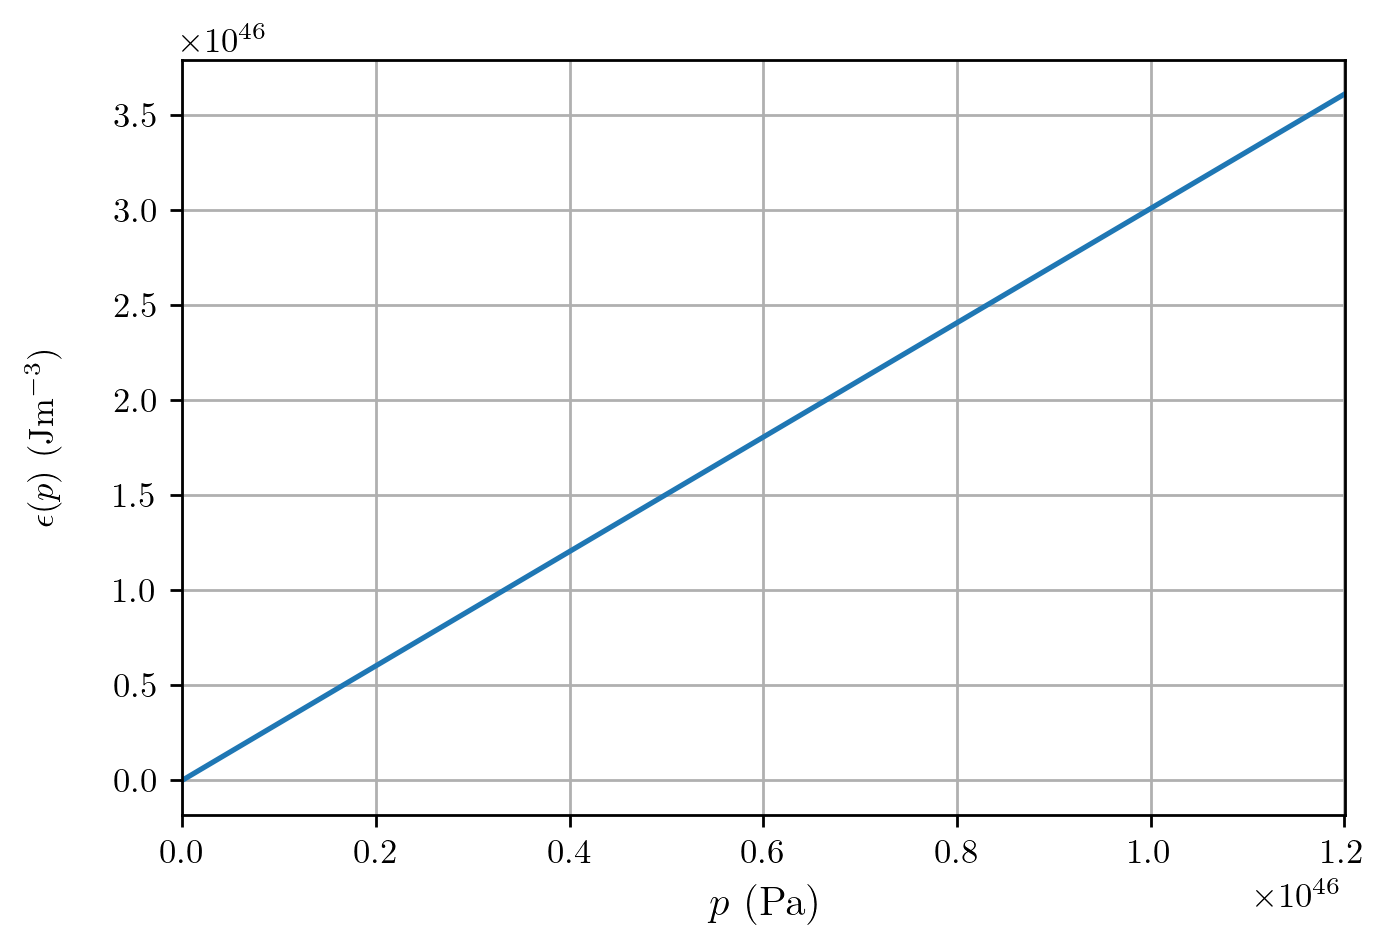

In [6]:
"""
pressure_values = np.arange(0, 1e40, 1e36, dtype = np.float64)
x_values = np.array([], dtype = np.float64)
for i in pressure_values:
    solution = optimize.root_scalar(function, args = (i,), method = 'bisect', bracket = [0, 10**12], rtol = 9*10**-15)
    x = solution.root
    x_values = np.append(x_values, x)
#print(x_values)

epsilon_values = epsilon(x_values)
#print(epsilon_values)

fig1 = plt.figure(dpi = 250)
ax1 = fig1.add_subplot(111)
ax1.plot(pressure_values, epsilon_values, color = '#3393FF')
ax1.set_xlabel("$p$ (Pa)", fontsize = "large")
ax1.set_ylabel("$\\epsilon (p)$ ($\\mathrm{{Jm^{{-3}}}}$)", labelpad = 15)
ax1.margins(x = 0)
ax1.grid()
"""
x_values_0 = np.array([0, 1.701e-4, 1.8e-4, 1.9e-4, 1.99e-4, 2.05e-4])
x_values_1 = np.arange(2.5e-4, 1e-3, 2e-5)
x_values_2 = np.arange(1e-3, 1e0, 1e-5)
x_values_3 = np.arange(1e0, 1e3, 1e-2)
x_values_4 = np.arange(1e3, 1e6, 1e1)

final_x_values = x_values_0
final_x_values = np.append(final_x_values, x_values_1)
final_x_values = np.append(final_x_values, x_values_2)
final_x_values = np.append(final_x_values, x_values_3)
final_x_values = np.append(final_x_values, x_values_4)

#test_x_values = np.arange(0, 1e6, 1e0)
final_pressure_values = pressure(final_x_values)
#print(test_pressure_values)
final_epsilon_values = epsilon(final_x_values)
#test_epsilon_elec_values = epsilon_elec(test_x_values)

fig2 = plt.figure(dpi = 250)
ax2 = fig2.add_subplot(111)
#ax2.plot(test_pressure_values, test_epsilon_values, color = '#3393FF')
ax2.plot(final_pressure_values, final_epsilon_values)
ax2.set_xlabel("$p$ (Pa)", fontsize = "large")
ax2.set_ylabel("$\\epsilon (p)$ ($\\mathrm{{Jm^{{-3}}}}$)", labelpad = 15)
ax2.margins(x = 0)
ax2.grid()

plt.show()

In [4]:
def EoS_e(p):
    
    solution = optimize.root_scalar(function, args = (p,), method = 'bisect', bracket = [0, 10**12], rtol = 8.88179e-16)
    #solution = optimize.brentq(function, 0, 10e12, args = (p,))
    #x = solution
    x = solution.root
    print(x)
    epsilon_value = epsilon(x)
    
    return epsilon_value

EoS_e(1500)

0.00017999114128389062


515117800155455.1

In [8]:
EoS_e(1e42)

95534.99701967809


3.076984717014484e+42

In [9]:
EoS_e(1e44)

302108.1868321334


3.024344704934992e+44

In [10]:
#test_pressure_values[0:1000]

In [11]:
#test_x_values[999]

In [12]:
#test_epsilon_values[0:100]

In [13]:
print(final_pressure_values.size)
print(final_epsilon_values.size)
print(final_pressure_values[-1])
print(final_epsilon_values[-1])

299744
299744
1.2004184191936764e+46
3.61008410481517e+46


In [14]:
spl = make_interp_spline(final_pressure_values, final_epsilon_values, k = 3)

#filtered_final_pressure_values = savgol_filter(final_pressure_values, 51, 3)
#filtered_final_pressure_values = savgol_filter(filtered_final_pressure_values, 5, 3)
#filtered_final_pressure_values = savgol_filter(filtered_final_pressure_values, 5, 3)
#f = interpolate.interp1d(filtered_final_pressure_values, final_epsilon_values)
f = interpolate.interp1d(final_pressure_values, final_epsilon_values)
#f = interpolate.splrep(final_pressure_values, final_epsilon_values, k = 3, s = 1000)
#f = interpolate.interp1d(final_pressure_values, f(final_pressure_values))
#f = interpolate.interp1d(final_pressure_values, f(final_pressure_values))
#g = interpolate.interp1d(filtered_final_pressure_values, f(filtered_final_pressure_values))
#h = interpolate.interp1d(filtered_final_pressure_values, g(filtered_final_pressure_values))


In [15]:
#h(1e44)
print(final_pressure_values[0:10])

[    0.          1301.54831913  1952.3224787   2603.09663827
  3253.87079784  3904.6449574   9761.61239351 14317.03151048
 19523.22478702 27332.51470183]


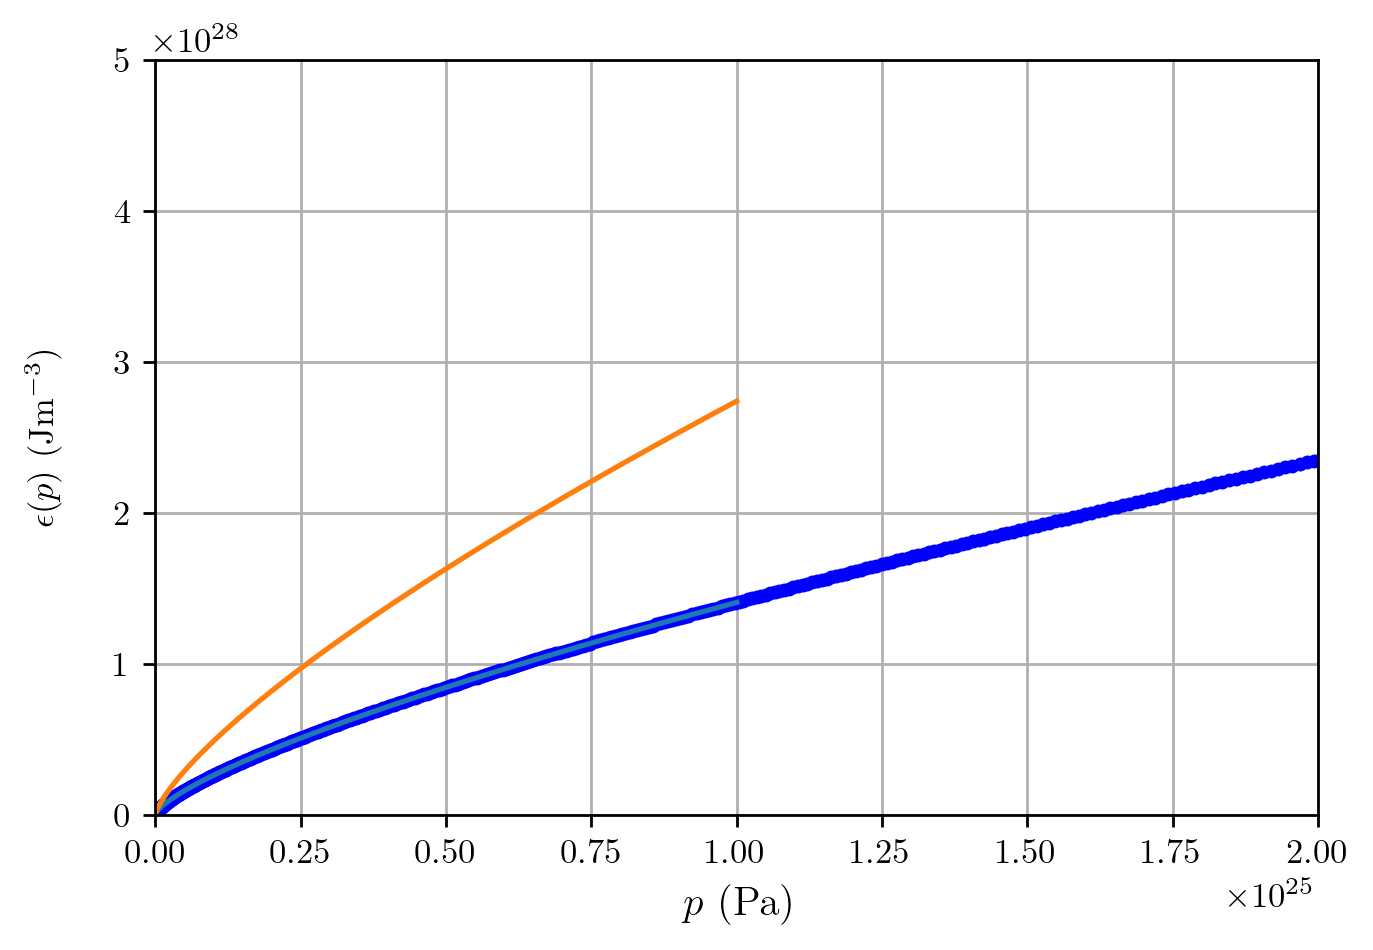

In [16]:
new_test_pressures = np.arange(0, 1e25, 1e22)
new_test_epsilons = f(new_test_pressures)
smooth_epsilons = spl(new_test_pressures)
epsilon_polytropes = epsilon_polytrope(new_test_pressures)

fig3 = plt.figure(dpi = 250)
ax3 = fig3.add_subplot(111)
#ax3.plot(filtered_final_pressure_values, final_epsilon_values)

ax3.plot(final_pressure_values, final_epsilon_values, 'b.')
ax3.plot(new_test_pressures, smooth_epsilons)
#ax3.plot(new_test_pressures, new_test_epsilons)
ax3.plot(new_test_pressures, epsilon_polytropes)

ax3.set_xlim(left = 0, right = 2e25)
ax3.set_ylim(bottom = 0., top = 5e28)

ax3.set_xlabel("$p$ (Pa)", fontsize = "large")
ax3.set_ylabel("$\\epsilon (p)$ ($\\mathrm{{Jm^{{-3}}}}$)", labelpad = 15)

ax3.margins(x = 0)
ax3.grid()

plt.show()

In [17]:
print(spl(1e-13))
print(f(1e-13))
print(EoS_e(1e-21))
print(spl(1e-21))
print(epsilon_polytrope(1e-21))

0.061448430131218146
0.033404564209480105
0.0001001019516967355
88609604945752.95
6.144843013121814e-10
8.658337286094814e-07


In [18]:
f(4e3)

array(7.71134443e+14)

In [7]:
EoS_e(5.619e24)

4.699202527844872


9.180304783352385e+27

In [20]:
epsilon(1.6828185708272068e-4)

420983479535163.9

In [21]:
pressure(2.5e-4)

9761.612393509067

In [22]:
test_1_pressures = final_pressure_values[0:10]
test_1_epsilons = final_epsilon_values[0:10]
test_spl = make_interp_spline(test_1_pressures, test_1_epsilons, k = 3)
test_smooth_epsilons = test_spl(test_1_pressures)

In [41]:
EoS_e(1e19)

0.254371534495001


1.453996046315292e+24